### <b> Performance Analysis
#### Packaged Units

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
df=pd.read_csv('1F_PAC1.csv')
df['Timestamp']=pd.to_datetime(df['Timestamp'],format="%d/%m/%Y %H:%M")


In [6]:
df[df['Power(kW)']<5].describe()

,Room_Temp(°C),COP,Power(kW),SupTemp(°C),RetTemp(°C),Amb_Hum(%RH),Amb_Temp(°C)
count,240.000000,240.0,258.000000,240.000000,240.000000,238.000000,238.000000
mean,24.320833,0.0,1.614341,26.275958,31.231875,51.805798,37.062479
std,1.225421,0.0,1.764409,4.868297,1.941042,9.218550,2.693506
min,22.500000,0.0,0.100000,16.280000,26.780000,29.750000,32.270000
25%,23.000000,0.0,0.100000,21.460000,29.780000,44.940000,35.300000
50%,24.500000,0.0,0.100000,26.835000,31.790000,51.695000,37.340000
75%,25.500000,0.0,2.400000,30.870000,32.790000,60.190000,38.360000
max,26.000000,0.0,4.900000,33.030000,34.800000,68.120000,44.410000


<h4> Consumed Power vs Room Temperature</h4>


Text(0, 0.5, 'Temperature C')

<Figure size 1440x720 with 0 Axes>

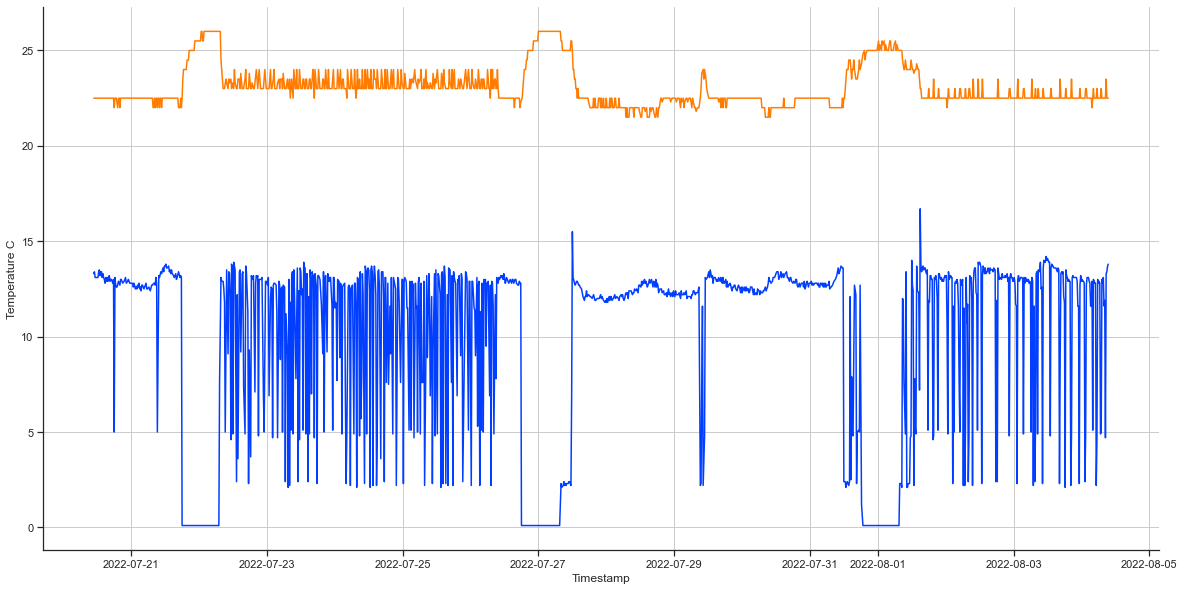

In [7]:
data=df[['Timestamp','Power(kW)','Room_Temp(°C)']]
data.set_index(data['Timestamp'],inplace=True)

custom_params={"axes.spines.right": False, "axes.spines.top": False,'axes.grid':True}
sns.set_theme(style='ticks',rc=custom_params)
# sns.axes_style() # shows the list of possible custom parameters
fig=plt.figure(figsize=[20,10])
sns.set_palette(palette='bright')
fig=plt.figure(figsize=[20,10])
# ax.clear
ax=sns.lineplot(data=data,dashes=False,legend=False)
ax.set_ylabel("Temperature C")
# ax2=ax.twinx()



No handles with labels found to put in legend.


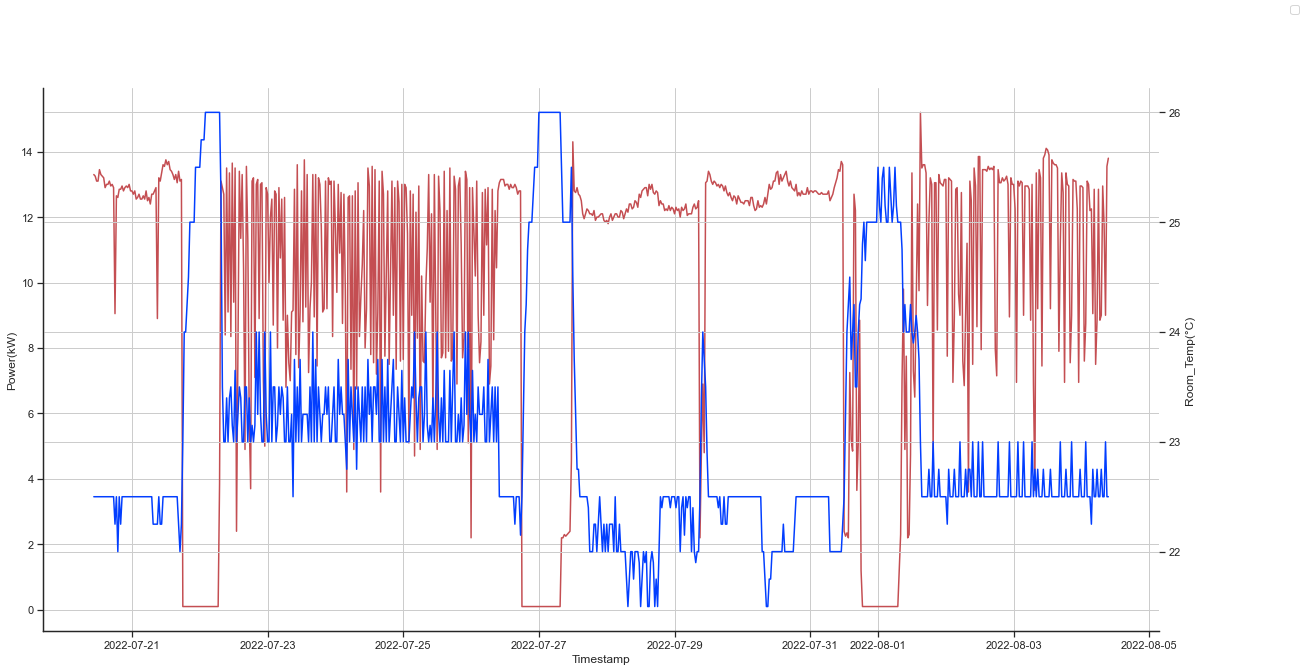

In [8]:
data=df[['Timestamp','Power(kW)','Room_Temp(°C)']].groupby(pd.Grouper(key='Timestamp',freq='30min')).mean()
# data.set_index(data['Timestamp'],inplace=True)

custom_params={"axes.spines.right": False, "axes.spines.top": False,'axes.grid':True}
sns.set_theme(style='ticks',rc=custom_params)
# sns.axes_style() # shows the list of possible custom parameters
fig=plt.figure(figsize=[20,10])
sns.set_palette(palette='bright')
# ax.clear
ax=sns.lineplot(data=data,x='Timestamp',y='Power(kW)',dashes=False,color="r")
# ax.set_ylabel("Temperature C")
ax2=ax.twinx()
ax2.set_label('Power')
ax2=sns.lineplot(data=data,x='Timestamp',y='Room_Temp(°C)',dashes=False,legend=False)
ax2.figure.legend()

# fig.legend('Room Temp','Power')

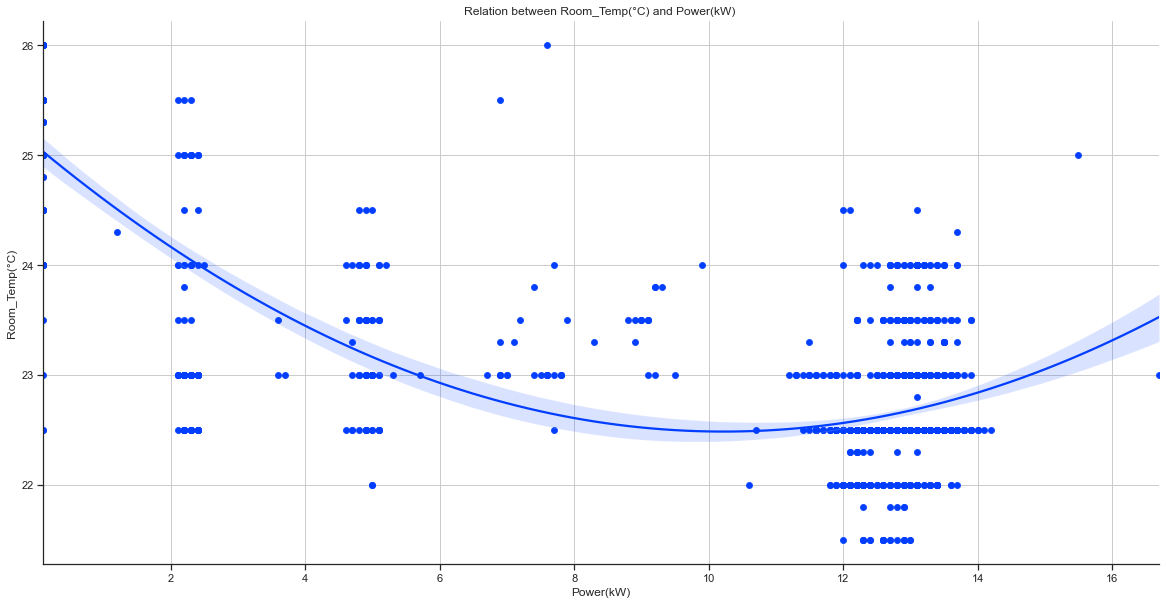

In [9]:
def draw(dataframe=df,X_data='Power(kW)',Y_data='Room_Temp(°C)',order=2):
    data=df
    # data=df.groupby(pd.Grouper(key='Timestamp',freq='30min')).mean()
    # data.set_index(data['Timestamp'],inplace=True)
    custom_params={"axes.spines.right": False, "axes.spines.top": False,'axes.grid':True}
    sns.set_theme(style='ticks',rc=custom_params)
    # sns.axes_style() # shows the list of possible custom parameters
    fig=plt.figure(figsize=[20,10])
    sns.set_palette(palette='bright')
    # ax.clear
    # ax=sns.lineplot(data=data,x='Timestamp',y='Power(kW)',dashes=False,color="r")
    ax=sns.scatterplot(data=data,x=X_data,y=Y_data)
    ax.set_title(f'Relation between {Y_data} and {X_data} ')
    sns.regplot(data=data,x=X_data,y=Y_data,order=order)
    
def drawCluster(dataframe=df,X_data='Power(kW)',Y_data='Room_Temp(°C)',n_clusters=3):
    
    # km contains the parameters of clustering
    km = KMeans(
        n_clusters=n_clusters, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    # Add cluster column
    data=df[[X_data,Y_data]]
    data=data.dropna(0)
    data['cluster']=km.fit_predict(X=data)
    # plot
    custom_params={"axes.spines.right": False, "axes.spines.top": False,'axes.grid':True}
    sns.set_theme(style='ticks',rc=custom_params)
    # sns.axes_style() # shows the list of possible custom parameters
    fig=plt.figure(figsize=[20,10])
    ax=sns.scatterplot(data=data,x=X_data,y=Y_data,hue='cluster',palette='Dark2_r')
    sns.set_palette(palette='PRGn')


# drawCluster(df,X_data='Power(kW)',Y_data='COP',n_clusters=2)    
draw(df,X_data='Power(kW)',Y_data='Room_Temp(°C)')    

<h5> there is no direct relation between Room Temperature and Power </h5>


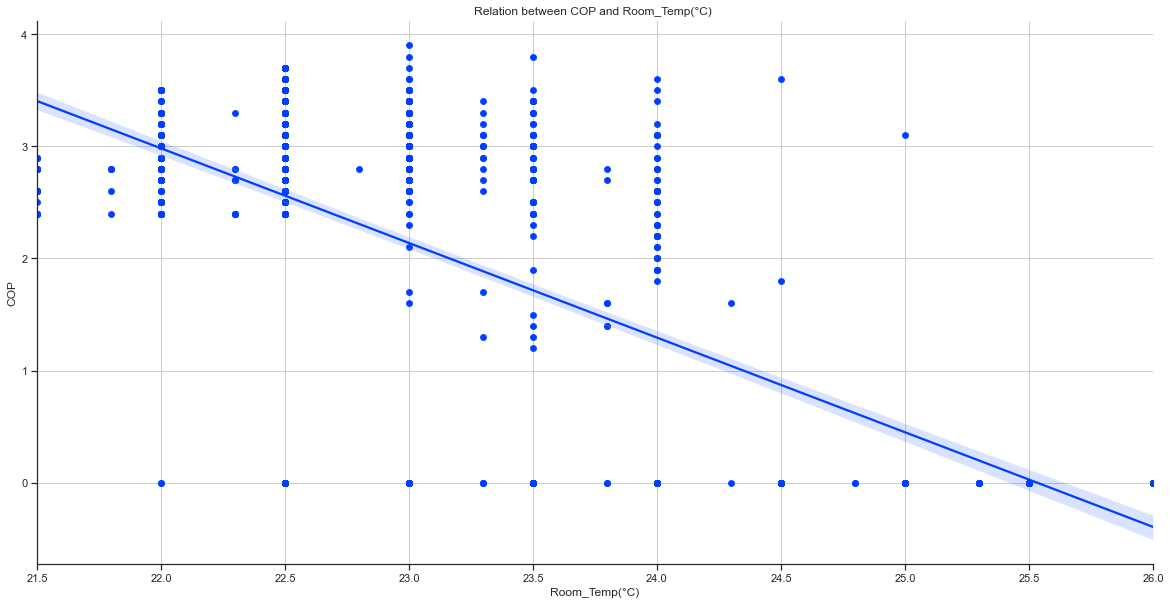

In [10]:
draw(df,Y_data='COP',X_data='Room_Temp(°C)',order=1)

<h5> COP is reversly proportional to the Room Temp </h5>
(the higher the room temp .. the lower the COP)

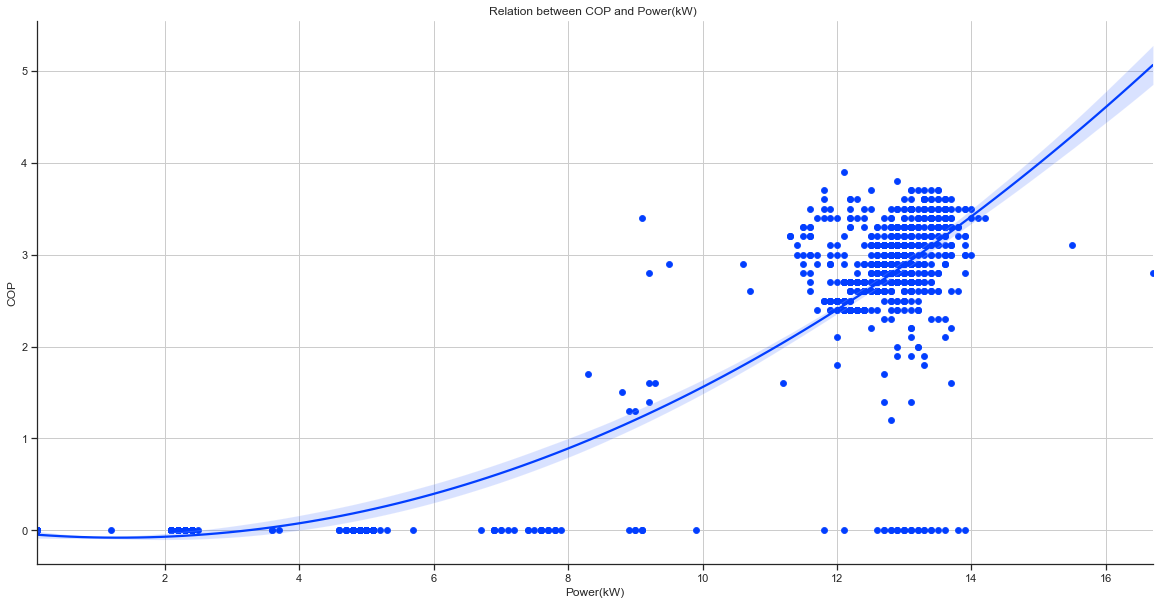

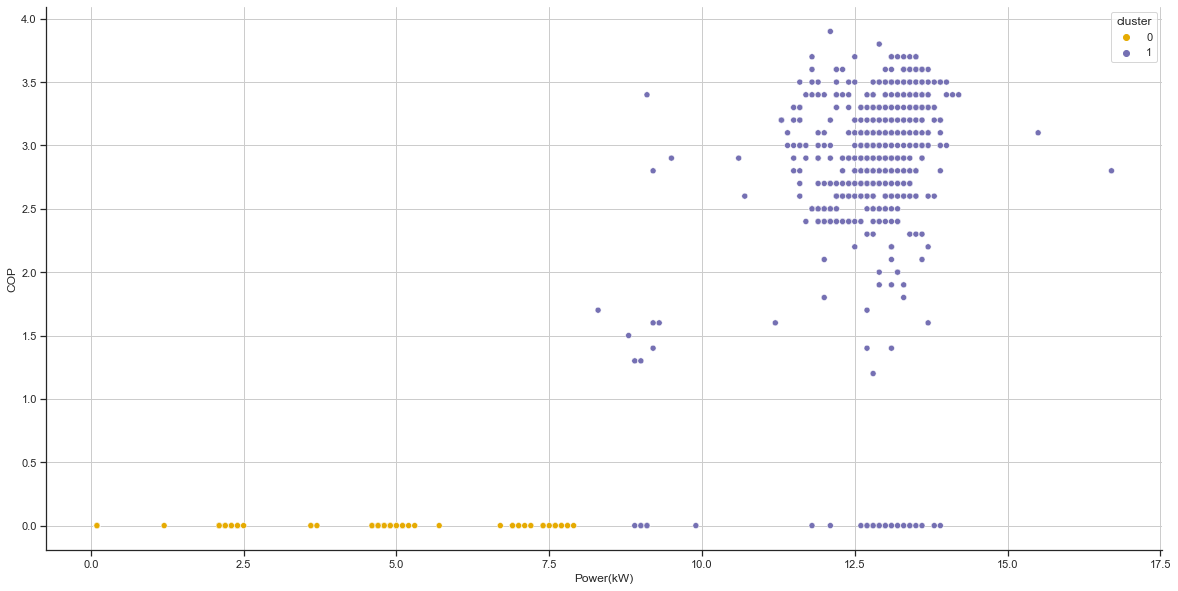

In [11]:
draw(df,Y_data='COP',X_data='Power(kW)',order=2)
drawCluster(df,X_data='Power(kW)',Y_data='COP',n_clusters=2)  

<h5> COP is directly proportional to the Power squared </h5>
(the higher the Power .. the higher the COP)
<br><br> The data can be clustered into two groups (0 COP, when the packaged is considered not running, and ~3 COP otherwise)


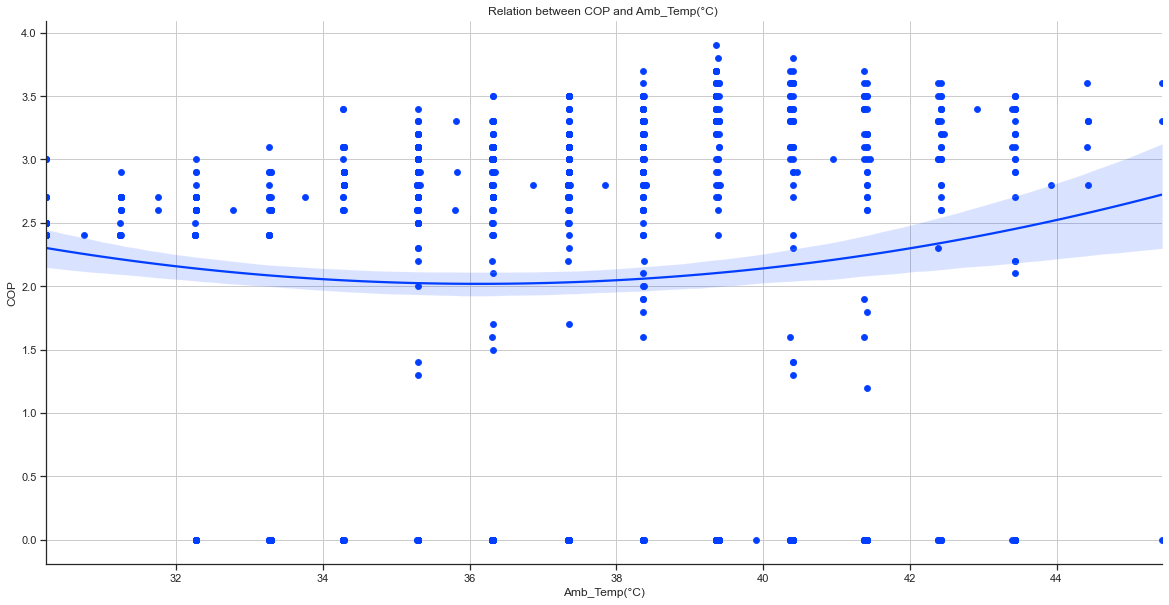

In [16]:
draw(df,Y_data='COP',X_data='Amb_Temp(°C)',order=2)

<h5> there is no direct relation between Ambient Temp and COP </h5>